In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data downloaded from github as getting space error while fetching direct from site
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

In [3]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

<AxesSubplot:>

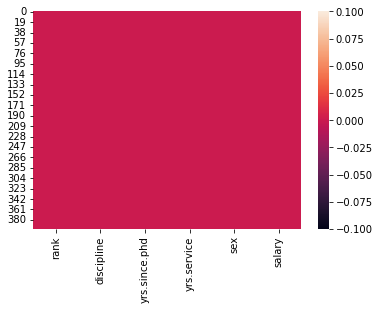

In [4]:
sns.heatmap(df.isnull())
#there is no null

In [5]:
df.isnull().sum()
# all data type look fine

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [6]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [7]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [8]:
#Making dataframe of ordinal data
df_vis_nom=df[["rank","discipline"]].copy()
df_vis_nom

,rank,discipline
0,Prof,B
1,Prof,B
2,AsstProf,B
3,Prof,B
4,Prof,B
...,...,...
392,Prof,A
393,Prof,A
394,Prof,A
395,Prof,A


Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


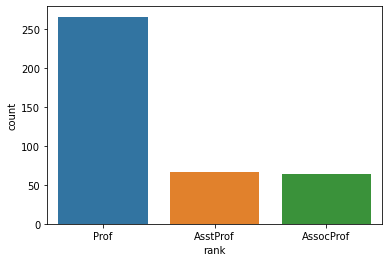

In [9]:
#Making dataframe of ordinal data
import seaborn as sns
ax=sns.countplot(x="rank",data=df_vis_nom)
print(df_vis_nom["rank"].value_counts())

B    216
A    181
Name: discipline, dtype: int64


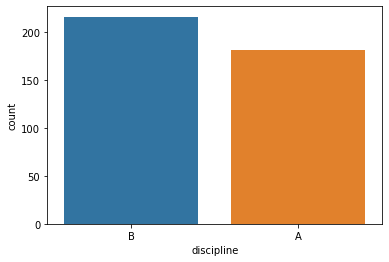

In [10]:
import seaborn as sns
ax=sns.countplot(x="discipline",data=df_vis_nom)
print(df_vis_nom["discipline"].value_counts())

In [11]:
#Making dataframe of ordinal data
df_vis_ord=df[["yrs.since.phd","yrs.service"]].copy()
df_vis_ord



,yrs.since.phd,yrs.service
0,19,18
1,20,16
2,4,3
3,45,39
4,40,41
...,...,...
392,33,30
393,31,19
394,42,25
395,25,15


<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

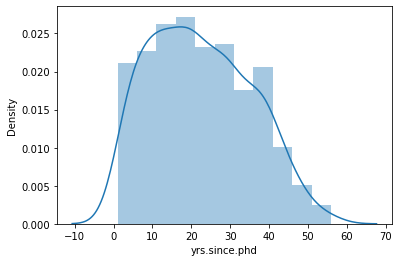

In [12]:
#checking ditribution of ordinal columns
df_vis_ord
sns.distplot(df_vis_ord["yrs.since.phd"],kde=True)

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

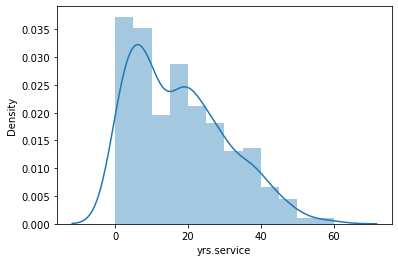

In [13]:
sns.distplot(df_vis_ord["yrs.service"],kde=True)

In [14]:
#Above shows data distributed not optimal and has outliers
# First we will use data encloding for converting string values to numeric for object datatypes
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [15]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
        

In [16]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


<AxesSubplot:>

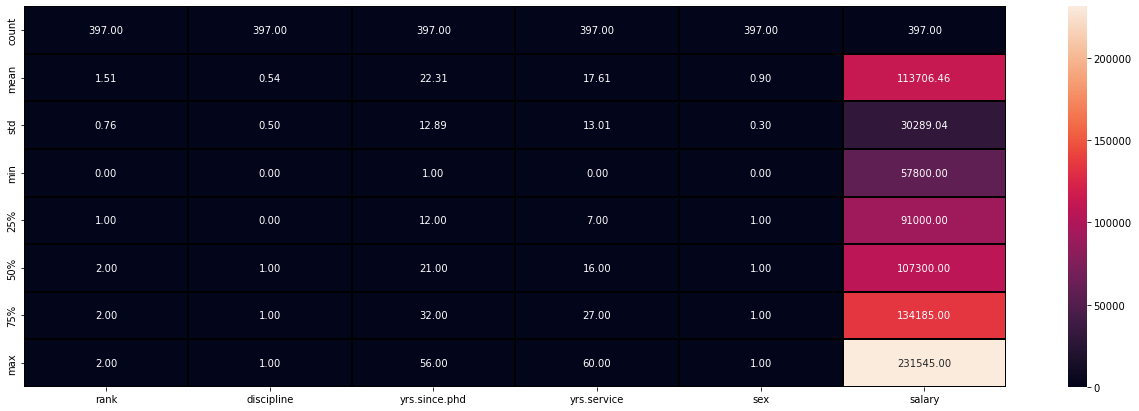

In [17]:
#Describing data in heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

<AxesSubplot:>

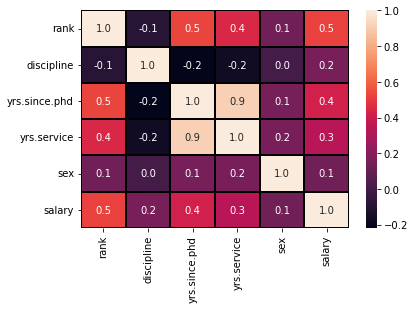

In [18]:
#Correlation in heatmap
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.1f")

In [19]:
#Sex is very low correlated with Salary , will drop
df1=df.drop("sex",axis=1)
df1

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2.0,1.0,19,18,139750
1,2.0,1.0,20,16,173200
2,1.0,1.0,4,3,79750
3,2.0,1.0,45,39,115000
4,2.0,1.0,40,41,141500
...,...,...,...,...,...
392,2.0,0.0,33,30,103106
393,2.0,0.0,31,19,150564
394,2.0,0.0,42,25,101738
395,2.0,0.0,25,15,95329


In [20]:
# We have seen data has outliers so need to remove
from scipy.stats import zscore
import numpy as np

In [21]:
z=np.abs(zscore(df1))

In [22]:
z.shape

(397, 5)

In [23]:
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([4, 3, 3, 4], dtype=int64))


In [24]:
len(np.where(z>3)[0])

4

In [25]:
df_new=df1[(z<3).all(axis=1)]

In [26]:
print("old dataframe",df1.shape)
print("new dataframe",df_new.shape)
print("total dropped",df1.shape[0]-df_new.shape[0])

old dataframe (397, 5)
new dataframe (393, 5)
total dropped 4


In [27]:
loss_percent=(397-393)/397*100
print(loss_percent,"%")

1.0075566750629723 %


In [28]:
df_new.skew()

rank            -1.135734
discipline      -0.179514
yrs.since.phd    0.288531
yrs.service      0.588861
salary           0.581098
dtype: float64

In [29]:
# We will break data into input and output and then remove skewness
inpt=df_new.drop("salary",axis=1)
target=df_new["salary"]

In [30]:
#Transform data to remove skewness
from sklearn.preprocessing import power_transform

In [31]:
inpt=power_transform(inpt,method='yeo-johnson')
pd.DataFrame(inpt).skew()

0   -0.818160
1   -0.179514
2   -0.134628
3   -0.129060
dtype: float64

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inpt=sc.fit_transform(inpt)
inpt

array([[ 0.69481738,  0.91457564, -0.11344983,  0.26888583],
       [ 0.69481738,  0.91457564, -0.03455335,  0.1209006 ],
       [-1.0753989 ,  0.91457564, -1.6242611 , -1.28449532],
       ...,
       [ 0.69481738, -1.09340328,  1.42772852,  0.72581897],
       [ 0.69481738, -1.09340328,  0.33874878,  0.04312953],
       [-1.0753989 , -1.09340328, -1.12908354, -1.11979784]])

In [46]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [34]:
#finding best random state
for i in range(0,100):
    inpt_train,inpt_test,target_train,target_test=train_test_split(inpt,target,test_size=0.2,random_state=i)
    lr.fit(inpt_train,target_train)
    pred_train=lr.predict(inpt_train)
    pred_test=lr.predict(inpt_test)
    print(f"at random state{i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"at random state{i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")


at random state0,the training accuracy is:- 0.42919944394742193
at random state0,the testing accuracy is:- 0.40317042242867496


at random state1,the training accuracy is:- 0.3869446937428265
at random state1,the testing accuracy is:- 0.548381880957381


at random state2,the training accuracy is:- 0.42522674021595963
at random state2,the testing accuracy is:- 0.4017703740741666


at random state3,the training accuracy is:- 0.4366448454960341
at random state3,the testing accuracy is:- 0.3534378944550898


at random state4,the training accuracy is:- 0.4430944965263883
at random state4,the testing accuracy is:- 0.3163178849061561


at random state5,the training accuracy is:- 0.4025324909057393
at random state5,the testing accuracy is:- 0.4942119600698578


at random state6,the training accuracy is:- 0.4610336431001645
at random state6,the testing accuracy is:- 0.2536655604556798


at random state7,the training accuracy is:- 0.4155555403111174
at random state7,the testing accuracy is:- 0.4

at random state91,the training accuracy is:- 0.4119415258133263
at random state91,the testing accuracy is:- 0.4659256645103609


at random state92,the training accuracy is:- 0.38921359400534317
at random state92,the testing accuracy is:- 0.5134140149236849


at random state93,the training accuracy is:- 0.4323361037526494
at random state93,the testing accuracy is:- 0.382672079465605


at random state94,the training accuracy is:- 0.4438808357263343
at random state94,the testing accuracy is:- 0.3061235687154009


at random state95,the training accuracy is:- 0.42664703752583366
at random state95,the testing accuracy is:- 0.40565148999764


at random state96,the training accuracy is:- 0.4330811058046129
at random state96,the testing accuracy is:- 0.37236752448661226


at random state97,the training accuracy is:- 0.43217886747693735
at random state97,the testing accuracy is:- 0.376907132436351


at random state98,the training accuracy is:- 0.41375283975906374
at random state98,the testing ac

In [55]:
#We will go with random state 30
inpt_train,inpt_test,target_train,target_test=train_test_split(inpt,target,test_size=0.2,random_state=30)
lr.fit(inpt_train,target_train)
predlr=lr.predict(inpt_test)
print(r2_score(target_test,predlr))


0.4217374301236325


In [67]:
cv_score=cross_val_score(lr,inpt,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.3613867271274098

In [ ]:
#below also gives very bad results
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(inpt_train,target_train)
svc.score(inpt_train,target_train)
predsvc=svc.predict(inpt_test)
print(accuracy_score(target_test,predsvc))
print(confusion_matrix(target_test,predsvc))
print(classification_report(target_test,predsvc))


In [ ]:
#below also gives very bad results
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(inpt_train,target_train)
dtc.score(inpt_train,target_train)
preddtc=dtc.predict(inpt_test)
print(accuracy_score(target_test,preddtc))
print(confusion_matrix(target_test,preddtc))
print(classification_report(target_test,preddtc))

In [63]:
#Regularization , getting best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(inpt_train,target_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [64]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(inpt_train,target_train)
ls.score(inpt_train,target_train)
pred_ls=ls.predict(inpt_test)
lss=r2_score(target_test,pred_ls)
lss

0.42179093619561214

In [66]:
cv_score=cross_val_score(ls,inpt,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.36177910068428387

In [68]:
#We will use ensembling technique for more improvement
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(inpt_train,target_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [69]:
rf=RandomForestRegressor(criterion="mae",max_features="log2")
rf.fit(inpt_train,target_train)
rf.score(inpt_train,target_train)
pred_decision=rf.predict(inpt_test)
rfs=r2_score(target_test,pred_decision)
print("r2_score",rfs*100)
rfscore=cross_val_score(rf,inpt,target,cv=5)
rfc=rfscore.mean()
print("cross val score:",rfc*100)

r2_score 56.04408077348676
cross val score: 29.323015085966965


In [71]:
#above gives better % accuracy than previous methods
import pickle

In [72]:
filename='salary.pkl'
pickle.dump(rf,open(filename,'wb'))

In [73]:
#Conclusion
loaded_model=pickle.load(open('salary.pkl','rb'))
result=loaded_model.score(inpt_test,target_test)
print(result)
                        

0.5604408077348676


In [75]:
#not working for me ,need help
conclusion=pd.DataFrame([loaded_model.predict(inpt_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
Predicted,78315.6,161769.96,83221.78,111069.785,124743.43,142853.975,74000.85,118776.685,112251.81,80390.43,...,125361.89,114219.78,70256.79,111623.1,103451.45,138414.605,120411.25,121227.225,123932.475,136239.195
Original,78315.6,161769.96,83221.78,111069.785,124743.43,142853.975,74000.85,118776.685,112251.81,80390.43,...,125361.89,114219.78,70256.79,111623.1,103451.45,138414.605,120411.25,121227.225,123932.475,136239.195
